# Video Killed The Radio Star

Notebook by David Marx ([@DigThatData](https://twitter.com/digthatdata))

Shared under MIT license

## What is this?

Point this notebook at a youtube url and it'll make a music video for you.

## How this animation technique works

For each text prompt you provide, the notebook will...

1. Generate an image based on that text prompt
2. Use the generated image as the `init_image` to recombine with the text prompt to generate variations similar to the first image. This produces a sequence of extremely similar images based on the original text prompt
3. This image sequence is then repeated several times to produce a longer sequence

The technique demonstrated in this notebook was inspired by a [video](https://www.youtube.com/watch?v=WJaxFbdjm8c) created by Ben Gillin.


In [ ]:
#pip install vktrs
!pip install -e .

In [3]:
# @markdown # Check GPU Status

from vktrs.utils import gpu_info

gpu_info()

0
Timestamp                2022/09/26 17:44:33.928
Name                     NVIDIA GeForce RTX 3090
Utilization gpu [%]                         24 %
Utilization memory [%]                      16 %
Memory used [mib]                        302 MiB
Memory free [mib]                      23963 MiB

In [1]:
# @title # 1. 🔑 Provide your API Key
# @markdown Running this cell will prompt you to enter your API Key below. 

# @markdown To get your API key, visit https://beta.dreamstudio.ai/membership

# @markdown ---

# @markdown A note on security best practices: **don't publish your API key.**

# @markdown We're using a form field designed for sensitive data like passwords.
# @markdown This notebook does not save your API key in the notebook itself,
# @markdown but instead loads your API Key into the colab environment. This way,
# @markdown you can make changes to this notebook and share it without concern
# @markdown that you might accidentally share your API Key. 
# @markdown 

import os, getpass

if True:
    os.environ['STABILITY_KEY'] = getpass.getpass('Enter your API Key')


In [ ]:
# embedding yt-dlp instead of CLI let's us hold on to the output filepaths
# probably way more trouble than it's worth and should just use yt-dlp CLI
#video_url = 'https://www.youtube.com/watch?v=WJaxFbdjm8c'
#!yt-dlp --write-auto-subs {video_url}


In [4]:
# @title # 4. Animation parameters

from omegaconf import OmegaConf
storyboard = OmegaConf.create()

storyboard.params = dict(

     video_url = 'https://www.youtube.com/watch?v=WJaxFbdjm8c' # @param {type:'string'}
    , theme_prompt = "extremely detailed, painted by ralph steadman and radiohead, beautiful, wow" # @param {type:'string'}

    , n_variations=1 # @param {type:'integer'}
    , image_consistency=0.85 # @param {type:"slider", min:0, max:1, step:0.01}
    , fps = 12 # @param {type:"slider", min:4, max:60, step:1}

    , output_filename = 'output.mp4' # @param {type:'string'}
    , add_caption = True # @param {type:'boolean'}
    , display_frames_as_we_get_them = True # @param {type:'boolean'}

    , optimal_ordering = True # @param {type:'boolean'}
    , whisper_seg = True # @param {type:'boolean'}
    , max_video_duration_in_seconds = 300 # @param {type:'integer'}


    #, max_frames = fps * max_video_duration_in_seconds
    , max_variations_per_opt_pass=15

)

storyboard.params.max_frames = storyboard.params.fps * storyboard.params.max_video_duration_in_seconds


print(f"Max total frames: {storyboard.params.max_frames}")
#print(f"Max API requests: {int(max_frames/repeat)}")

if storyboard.params.optimal_ordering:

    opt_batch_size = storyboard.params.n_variations
    while opt_batch_size > storyboard.params.max_variations_per_opt_pass:
        opt_batch_size /= 2
    print(f"Frames per re-ordering batch: {opt_batch_size}")
    storyboard.params.opt_batch_size = opt_batch_size

with open('storyboard.yaml') as fp:
    OmegaConf.save(config=storyboard, f=fp.name)

Max total frames: 3600
Frames per re-ordering batch: 1


In [5]:
# Hi user! one last thing you need to do: replace the text below
# with your song lyrics. Each non-blank line will be a separate "scene" in the
# final animation.

storyboard.params.user_provided_captions = """
Global controls will have to be imposed
And a world governing body, will be created to enforce them
Crises, precipitate change
Secretly plotting your demise

I wanna devise a virus
To bring dire straits to your environment
Crush your corporations with a mild touch
Trash your whole computer system and revert you to papyrus
I want to make a super virus
Strong enough to cause blackouts in every single metropolis
Cause they don't wanna unify us
So fuck-it total anarchy and can't nobody stop us

You see late in the evening
Fucked up on my computer and my mind starts roaming
I create like a heathen
The first cycles of this virus I can send through a modem
Infiltration hits your station
No Microsoft or enhanced DOS will impede
Society thinks they're safe when
Bingo! Hard drive crashes from the rending
A lot of hackers tried viruses before
Vaporize your text like so much white out
I want it where a file replication is a chore
Lights out shut down entire White House
I don't want just a bug that could be corrected
I'm erecting immaculate design
Break the nation down, section by section
Even to the greatest minds it's impossible to find

I wanna devise a virus
To bring dire straits to your environment
Crush your corporations with a mild touch
Trash your whole computer system and revert you to papyrus
I wanna devise a virus
To bring dire straits to your environment
Crush your corporations with a mild touch
Trash your whole computer system and revert you to papyrus

We have already planned
The plan is programmed into every one of my thousand robots
We will not hesitate; we will destroy the Homosapien!
Please, stay where you are

Psst, ay, I'm makin' some shit in my basement
Bout to do it to 'em, don't tell 'em though
Alright I love you, peace

I want to develop a super virus
Better by far than that old Y2K
This is 3030 the time of global unification
Break right through they
Terminals, burn 'em all, slaves to silicon
Corrupt politicians with leaders and their keywords
F.B.I. and spies stealin' bombs
De-cipitate they plans in their face and catch the fever
Everybody loot the stores get your canned goods
Even space stations are having a hard time
Peacekeepers seek to take our manhood
Which results in the form of global apartheid
Ghettos are trash dumps with gas pumps
Exploding and burnt out since before the great union
The last punks walk around like masked monks
Ready to manipulate the database or break through 'em
Human rights come in a hundredth place
Mass production has always been number one
New Earth has become a repugnant place
So it's time to spread the fear to thunder some

Too long have we tried 
to extend our glorious empire out to the stars
Only to be driven back

I wanna devise a virus
To bring dire straits to your environment
Crush your corporations with a mild touch
Trash your whole computer system and revert you to papyrus
I wanna devise a virus
To bring dire straits to your environment
Crush your corporations with a mild touch
Trash your whole computer system and revert you to papyrus
"""

with open('storyboard.yaml') as fp:
    OmegaConf.save(config=storyboard, f=fp.name)

In [6]:
%%capture

### installations and definitions

#!pip install yt-dlp
#!pip install python-tsp
#!pip install webvtt-py # only need this if srv2 isn't available

#https://github.com/explosion/tokenizations
#!pip install pytokenizations


import datetime as dt

import json
import os
from pathlib import Path
import re
import string
from subprocess import Popen, PIPE
import textwrap
import time
import warnings

import tokenizations
import webvtt


#import getpass

from IPython.display import display
import numpy as np


from itertools import chain, cycle
from tqdm.notebook import tqdm

from vktrs.youtube import (
    YoutubeHelper,
    parse_timestamp,
    vtt_to_token_timestamps,
    srv2_to_token_timestamps,
)

from vktrs.utils import remove_punctuation
from vktrs.api import get_image_for_prompt


def get_variations_w_init(prompt, init_image, **kargs):
  return list(get_image_for_prompt(prompt=prompt, init_image=init_image, **kargs))

def get_close_variations_from_prompt(prompt, n_variations=2, image_consistency=.7):
  """
  prompt: a text prompt
  n_variations: total number of images to return
  image_consistency: float in [0,1], controls similarity between images generated by the prompt.
                     you can think of this as controlling how much "visual vibration" there will be.
                     - 0=regenerate each image independently without consideration for other images generated by prompt
                     - 1=images are all completely identical
  """
  images = list(get_image_for_prompt(prompt))
  for _ in range(n_variations - 1):
     img = get_variations_w_init(prompt, images[0], start_schedule=(1-image_consistency))[0]
     images.append(img)
  return images


In [7]:
%%capture

# Download subtitles and audio from youtube

video_url = storyboard.params.video_url
helper = YoutubeHelper(video_url)

# to do: check if user provided an audio filepath before attempting to download from youtube

#input_audio = list(Path('.').glob('*.webm'))[0]
input_audio = helper.info['requested_downloads'][-1]['filepath']
!ffmpeg -y -i "{input_audio}" -acodec libmp3lame audio.mp3

# to do: write audio and subtitle paths/meta to storyboard

subtitle_format = helper.info['requested_subtitles']['en']['ext']
subtitle_fpath = helper.info['requested_subtitles']['en']['filepath']


if subtitle_format == 'srv2':
    with open(subtitle_fpath, 'r') as f:
        srv2_xml = f.read() 
    token_start_times = srv2_to_token_timestamps(srv2_xml)

elif subtitle_format == 'vtt':
    captions = webvtt.read(subtitle_fpath)
    token_start_times = vtt_to_token_timestamps(captions)

# If unable to download supported subtitles, force use whisper
else:
    storyboard.params.whisper_seg = True

whisper_seg = storyboard.params.whisper_seg

In [8]:
### transcribe and segment speech using whisper

if whisper_seg:
  whispers = {
      'tiny':None, # 5.83 s
      'large':None # 3.73 s
  }
  # accelerated runtime required for whisper
  # to do: pypi package for whisper
  !pip install git+https://github.com/openai/whisper
  import whisper
  import time

  options = whisper.DecodingOptions(
      language='en',
  )
  for k in whispers.keys():
      options = whisper.DecodingOptions(
          language='en',
      )
      # to do: be more proactive about cleaning up these models when we're done with them
      model = whisper.load_model(k).to('cuda')
      start = time.time()
      print(f"Transcribing audio with whisper-{k}")
      
      # to do: calling transcribe like this unnecessarily re-processes audio each time.
      whispers[k] = model.transcribe("audio.mp3") # re-processes audio each time, ~10s overhead?
      print(f"elapsed: {time.time()-start}")

  # sanitize and tokenize
  whispers_tokens = {}
  for k in whispers:
    whispers_tokens[k] = [
      remove_punctuation(tok) for tok in whispers[k]['text'].split()
    ]

  # align sequences
  tiny2large, large2tiny = tokenizations.get_alignments( #seqdiff.diff( #= tokenizations.get_alignments(
      whispers_tokens['tiny'],
      whispers_tokens['large']
  )

  Cloning https://github.com/openai/whisper to /tmp/pip-req-build-v6hdwnjw
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper /tmp/pip-req-build-v6hdwnjw
  Resolved https://github.com/openai/whisper to commit b4308c478217f00436c387694e5e848cc87c7fb5
  Preparing metadata (setup.py) ... done

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


/home/dmarx/.local/share/virtualenvs/dmarx-je5LfYh2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Transcribing audio with whisper-tiny
elapsed: 6.365201950073242
Transcribing audio with whisper-large
elapsed: 27.004253387451172


In [9]:
#torch.cuda.is_available()
#torch.__version__
#%pip uninstall -y torch torchvision torchaudio
#%pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

'1.12.1+cu102'

In [ ]:
# to do: move this stuff
if whisper_seg:

  idx=0
  tokenized_prompts_tiny = []
  for phrase_idx, phrase in enumerate(whispers['tiny']['segments']):
    rec = {
        'start': phrase['start'],
        'end': phrase['end'],
        'tokens':[],
        'indices':[],
    }

    # TO DO: I should really use this tokenization for the alignment step to ensure the indices match up
    for tok in phrase['text'].split():
      tok = remove_punctuation(tok)
      rec['tokens'].append(tok)
      rec['indices'].append(idx)
      idx+=1

    tokenized_prompts_tiny.append(rec)

  # flatten
  token_tinyindex_segmentations = {}
  for rec in tokenized_prompts_tiny:
    for j, idx in enumerate(rec['indices']):
      token_tinyindex_segmentations[idx] ={
          'token':rec['tokens'][j],
          'start':rec['start'],
          'end':rec['end'],
      }
#token_tinyindex_segmentations
  token_large_index_segmentations = {}
  for i, result in enumerate(large2tiny):
    rec_large = {'token':whispers_tokens['large'][i]}
    for j in result:
      rec_tiny = token_tinyindex_segmentations[j]
      if not rec_large.get('start'):
        rec_large['start'] = rec_tiny['start']
        rec_large['end'] = rec_tiny['end']
    
    # handle null result. this could be more elegant/DRY, but this way is less confusing to me at least.
    # basically, we're just backfilling here, so each entry will have a start and end time
    if not rec_large.get('start'):
      if i == 0:
        rec_large['start'] = 0
      else:
        rec_prev = token_large_index_segmentations[i-1]
        rec_large['start'] = rec_prev['start']
        rec_large['end'] = rec_prev['end']
    
    token_large_index_segmentations[i] = rec_large



### apply whisper-tiny segmentations to whisper-large transcriptions

  token_large_phrase_segmentations = []
  start_prev = 0
  end_prev=0
  current_phrase = []
  for rec in token_large_index_segmentations.values():
    print(current_phrase)
    print(start_prev, end_prev, rec)
    # we're in the same phrase as previous step
    if rec['start'] == start_prev:
      print("still in phrase")
      current_phrase.append(rec['token'])
      start_prev = rec['start']
      end_prev = rec['end']
      continue
  
    # we're in the next phrase, 
    token_large_phrase_segmentations.append({
        'tokens': current_phrase,
        'start':start_prev,
        'end':end_prev,
    })
    current_phrase = []

    # ...which starts immediately after the previous phrase
    if rec['start'] == end_prev:
      print("new starts where expected")
      current_phrase.append(rec['token'])
      start_prev = rec['start']
      end_prev = rec['end']
      continue
    
    # ...or else there's a gap between when the last phrase ended and this one starts,
    # and I'm frankly not sure how I want to adress that yet.
    else:
      #raise NotImplementedError
      # let's just do.. this? for now? I guess?
      print("ruh roh")
      current_phrase.append(rec['token'])
      start_prev = rec['start']
      end_prev = rec['end']
      continue

  prompt_starts = [
    {'ts':rec['start'],
    'td':dt.timedelta(seconds=rec['start']),
    'prompt':' '.join(rec['tokens'])
    }
    for rec in token_large_phrase_segmentations]

In [ ]:
for rec in token_large_phrase_segmentations:
  print(f"[{rec['start']} -> {rec['end']}] {' '.join(rec['tokens'])}")

In [ ]:
# to do: write this into the storyboard
prompt_starts

In [ ]:
#tokenized_prompts_tiny
#prompt_starts
# to do: I should be able to modify timings on this object without needing to regenerate frames

In [ ]:
#?model.transcribe # DecodingOptions probably contains timestamp prediction thing
# https://github.com/openai/whisper/blob/main/whisper/decoding.py#L72
# - without_timestamps already defaults to False, which is what we want

###############

# another candidate from google:
# - https://tfhub.dev/s?q=trillsson
# - https://ai.googleblog.com/2022/03/trillsson-small-universal-speech.html
# and another (is there a checkpoint?)
# - https://arxiv.org/pdf/2109.13226.pdf
# one more...
# - cap12 embeddings - https://arxiv.org/abs/2110.04621

In [ ]:
### This cell aligns the user-provided lyrics with the timestamped tokens

# to do: make this compatible with the whisper segmentation
# to do: trigger this cell based on storyboard state
if False:

  prompts = [p.strip() for p in user_provided_captions.split('\n') if p.strip()]

  tokenized_prompts = [
      [remove_punctuation(tok) for tok in prompt.lower().split()] for prompt in prompts
  ]

  # assign each prompt token a unique index, and let's just try to map those indices into
  # the timestamped stuff.

  if whisper_seg:
    prompt_starts = whisper_segmentation
    # make sure we respect the duration of the previous phrase
    
  else:

    idx = 0
    prompt_token_indices = []
    flattened_prompts = []
    for prompt in tokenized_prompts:
        prompt_ = []
        for tok in prompt:
          prompt_.append(idx)
          flattened_prompts.append(tok)
          idx+=1
        prompt_token_indices.append(prompt_)


    ### using spacy's tokenization alignment

    flattened_ts = [rec['tok'] for rec in token_start_times]
    prompt2ts, ts2prompt = tokenizations.get_alignments(
        flattened_prompts,
        flattened_ts
    )

    prompt_idx = 0
    prompt_starts = [{'ts':token_start_times[0]['ts'],
                      'td':token_start_times[0]['td'],
                      'prompt':prompts[0],
                      }]
    for i, result in enumerate(prompt2ts):
      if not result:
        continue
      j = result[0]
      start_rec = token_start_times[j]
      prompt = prompt_token_indices[prompt_idx]
      if i > prompt[-1]:
        prompt_idx+=1
        prompt_indices = prompt_token_indices[prompt_idx]
        prompt = prompts[prompt_idx]
        prompt_starts.append(
            {'ts':start_rec['ts'],
            'td':start_rec['td'],
            'prompt':prompt}
        )


In [10]:
### This cell computes how many frames are needed for each segment
### based on the start times for each prompt

import datetime as dt
fps = storyboard.params.fps

ifps = dt.timedelta(seconds=1/fps)

# estimate video end
video_duration = dt.timedelta(seconds=helper.info['duration'])

# dummy prompt for last scene duration
prompt_starts.append({'td':video_duration})

# make sure we respect the duration of the previous phrase
frame_start=dt.timedelta(seconds=0)
prompt_starts[0]['anim_start']=frame_start
for i, rec in enumerate(prompt_starts[1:], start=1):
  rec_prev = prompt_starts[i-1]
  k=0
  while rec_prev['anim_start'] + k*ifps < rec['td']:
    k+=1
  k-=1
  rec_prev['frames'] = k
  rec_prev['anim_duration'] = k*ifps
  frame_start+=k*ifps
  rec['anim_start']=frame_start

# make sure we respect the duration of the previous phrase
# to do: push end time into a timedelta and consider it... somewhere near here
for i, rec1 in enumerate(prompt_starts):
    rec0 = prompt_starts[i-1]
    rec0['duration'] = rec1['td'] - rec0['td']

# drop the dummy frame
prompt_starts = prompt_starts[:-1]

# to do: given a 0 duration prompt, assume its duration is captured in the next prompt 
#        and guesstimate a corrected prompt start time and duration 


#for rec in prompt_starts:
#  print(
#      f"[{rec['anim_start']} | {rec['ts']}] [{rec['duration']} | {rec['anim_duration']}] - {rec['frames']} - {rec['prompt']}"
#  )


In [26]:
# to do: use this object to loop over prompts and attach scene-specific settings to the dict
# when generating, attach the base image and the variations as well
# this gives users and interception point where they could e.g. specify a base/init image to get variations for
#prompt_starts
prompt_starts[0]

{'ts': 0,
 'td': 0.0,
 'prompt': 'Global controls will have to be imposed and a world governing body will be created to enforce them',
 'anim_start': 0.0,
 'frames': 99,
 'anim_duration': 8.249967,
 'duration': 8.32,
 'frame0': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512>,
 'variations': [],
 'images': [<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512>],
 'images_raw': [<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512>]}

In [28]:
for rec in prompt_starts:
    for k,v in list(rec.items()):
        if isinstance(v, dt.timedelta):
            rec[k] = v.total_seconds()
        # to do: add file paths in here or something...
        # or maybe use this step to write them? I dunno
        # flush images for now
        if k in ('frame0','variations','images', 'images_raw'):
            rec.pop(k)


storyboard.prompt_starts = prompt_starts

# to do: deal with these td objects
with open('storyboard.yaml') as fp:
    OmegaConf.save(config=storyboard, f=fp.name)

[0.0 | 0] [8.32 | 8.249967] - 99 - Global controls will have to be imposed and a world governing body will be created to enforce them
exiting image getter...
Global controls will have to be imposed and a world governing body will be created to enforce them


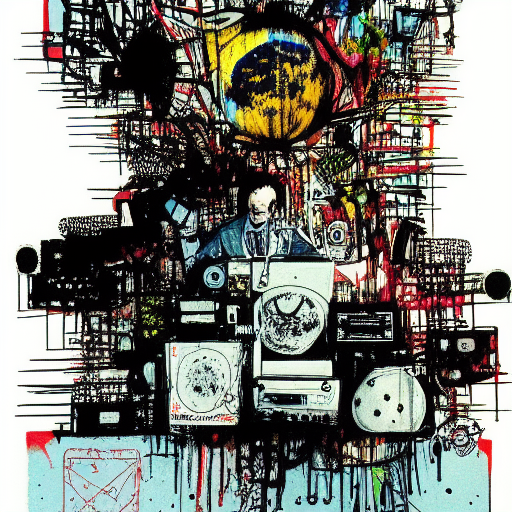

[8.249967 | 8.32] [4.0 | 3.999984] - 48 - Crises precipitate change Secretly plotting your demise
exiting image getter...
Crises precipitate change Secretly plotting your demise


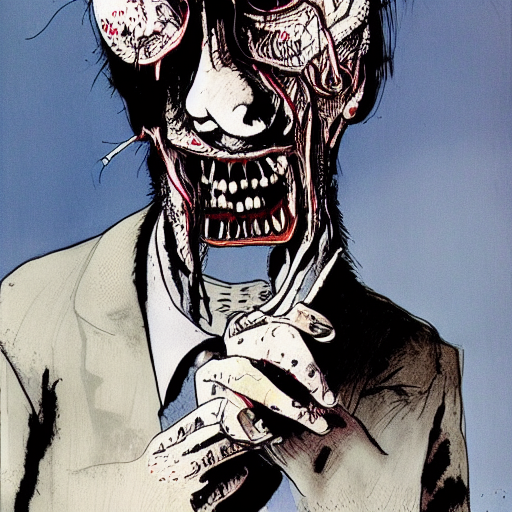

[12.249951 | 12.32] [15.28 | 15.333272] - 184 - I want to devise a virus to bring Dire straight to your environment
exiting image getter...
I want to devise a virus to bring Dire straight to your environment


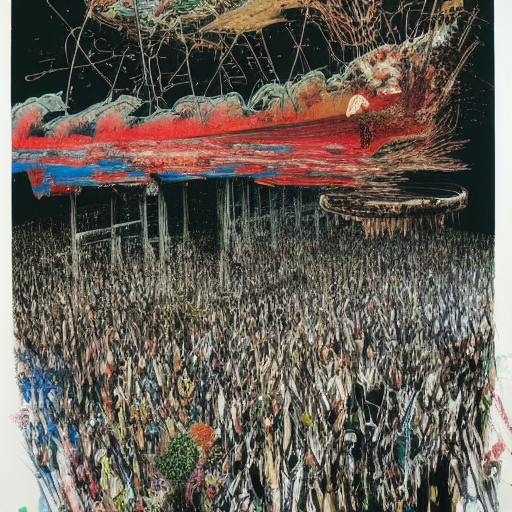

[27.583223 | 27.6] [2.08 | 2.083325] - 25 - Crush the corporations with a mild touch
exiting image getter...
Crush the corporations with a mild touch


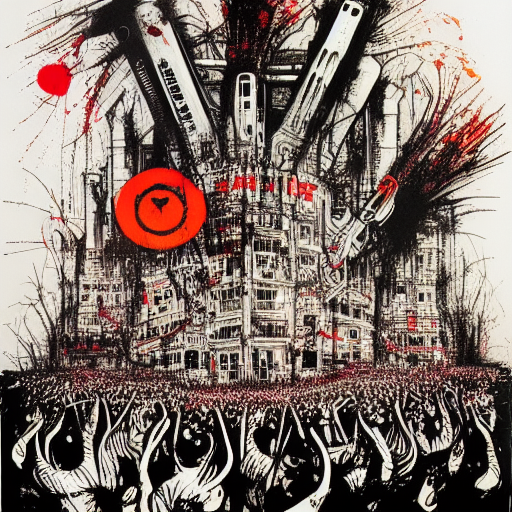

[29.666548 | 29.68] [3.52 | 3.499986] - 42 - Trash the whole computer system and revert you to papyrus
exiting image getter...
Trash the whole computer system and revert you to papyrus


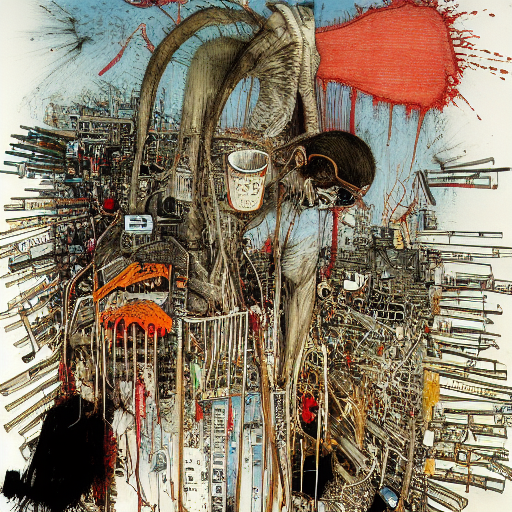

[33.166534 | 33.2] [2.2 | 2.166658] - 26 - I want to make a super virus
exiting image getter...
I want to make a super virus


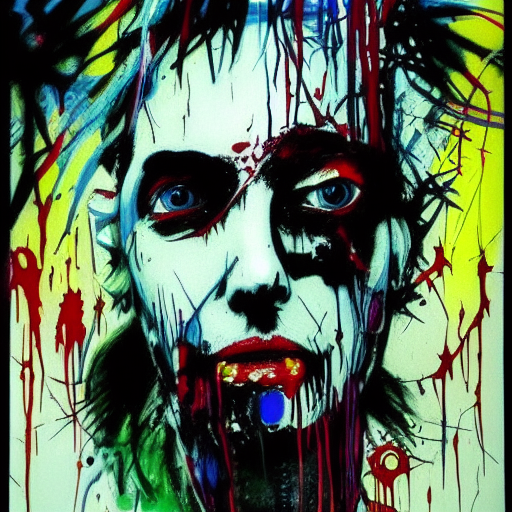

[35.333192 | 35.400000000000006] [4.16 | 4.16665] - 50 - Strong enough to cause blackouts in every single metropolis Cause they dont want to
exiting image getter...
Strong enough to cause blackouts in every single metropolis Cause they dont want to


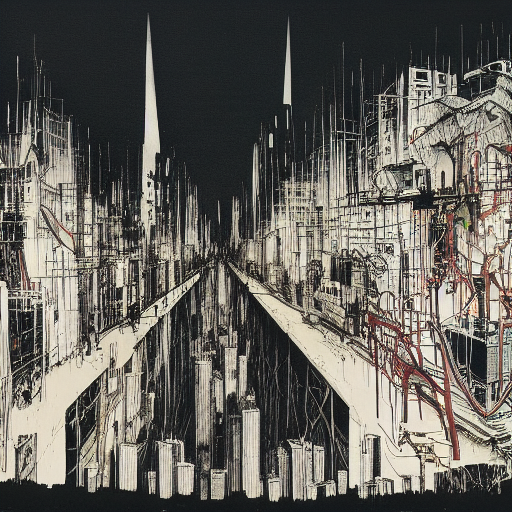

[39.499842 | 39.56] [4.12 | 4.16665] - 50 - unify us So fuck it Total anarchy and can nobody stop us
exiting image getter...
unify us So fuck it Total anarchy and can nobody stop us


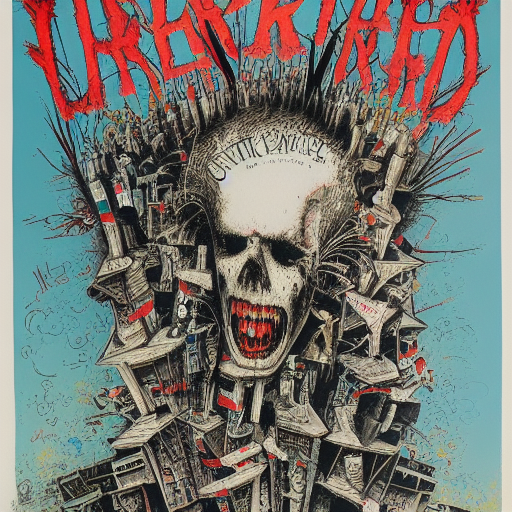

[43.666492 | 43.68] [5.16 | 5.166646] - 62 - You see late in the evening Fucked up on my computer and my mind starts roaming
exiting image getter...
You see late in the evening Fucked up on my computer and my mind starts roaming


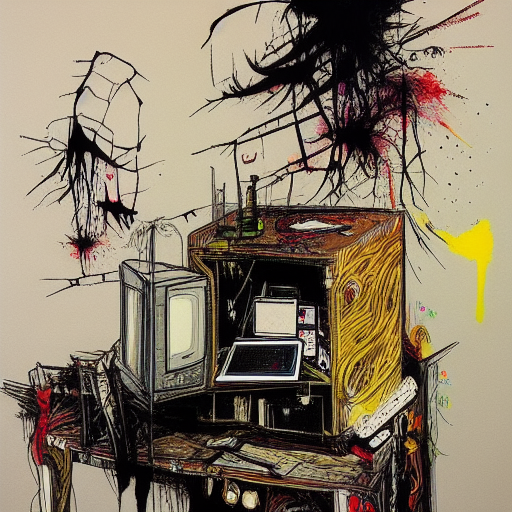

[48.833138 | 48.84] [2.0 | 1.999992] - 24 - I create like a heathen


KeyboardInterrupt: 

In [29]:
# generate animation

frames = []
theme_prompt = storyboard.params.theme_prompt
optimal_ordering = storyboard.params.optimal_ordering
add_caption = False # storyboard.params.add_caption
display_frames_as_we_get_them = storyboard.params.display_frames_as_we_get_them
max_frames = storyboard.params.max_frames
image_consistency = storyboard.params.image_consistency
n_variations = storyboard.params.n_variations
max_variations_per_opt_pass = storyboard.params.max_variations_per_opt_pass

from vktrs.api import (
    get_image_for_prompt
)
from vktrs.tsp import (
    tsp_permute_frames,
    batched_tsp_permute_frames,
)

from vktrs.utils import add_caption2image

for rec in prompt_starts:
    print(
        f"[{rec['anim_start']} | {rec['ts']}] [{rec['duration']} | {rec['anim_duration']}] - {rec['frames']} - {rec['prompt']}"
    )
    lyric = rec['prompt']
    #n_variations = rec['frames']
    prompt = f"{lyric}, {theme_prompt}"
    #images = get_close_variations_from_prompt(prompt, n_variations=n_variations, image_consistency=image_consistency)
    if rec.get('frame0') is None:
        rec['frame0'] = init_image = list(get_image_for_prompt(prompt))[0]
        #img_gen = get_image_for_prompt(prompt)
        #imgs0 = list(img_gen)
        #rec['frame0'] = init_image = imgs0[0]
    # to do: use SDK args to request multiple images in single request...
    images = []
    #rec['variations'] = get_variations_w_init(prompt, images[0], start_schedule=(1-image_consistency))[0]
    for _ in range(n_variations - 1):
      img = get_variations_w_init(prompt, init_image, start_schedule=(1-image_consistency))[0]
      images.append(img)
    rec['variations'] = images
    images = [rec['frame0']] + images

    if optimal_ordering:
        images = batched_tsp_permute_frames(
            images,
            max_variations_per_opt_pass
        )
    rec['images'] = rec['images_raw'] = images


    if add_caption:
        rec['images'] = [add_caption2image(im, lyric) for im in rec['images']]

    if display_frames_as_we_get_them:
        print(lyric)
        for im in images:
            display(im)

    #images *= repeat
    sequence = []
    frame_factory = cycle(images)
    while len(sequence) < rec['frames']:
        sequence.append(next(frame_factory))
    frames.extend(sequence)
    if len(frames) >= max_frames:
        break

In [ ]:
# @title # 6. 🎥 Compile your video!

#input_audio = '/content/Ai Generated Music Video - Deltron 3030 - Virus [WJaxFbdjm8c].webm'

# to do: add this to dmarx/fine ...which really needs a better name. as usual.

input_audio = 'audio.mp3'

cmd_in = ['ffmpeg', '-y', '-f', 'image2pipe', '-vcodec', 'png', '-r', str(fps), '-i', '-']
cmd_out = ['-vcodec', 'libx264', '-r', str(fps), '-pix_fmt', 'yuv420p', '-crf', '1', '-preset', 'veryslow', '-shortest', output_filename]

if input_audio:
  cmd_in += ['-i', str(input_audio), '-acodec', 'libmp3lame']

cmd = cmd_in + cmd_out

p = Popen(cmd, stdin=PIPE)
#for im in tqdm(chain(frames)):
for im in tqdm(frames):
  im.save(p.stdin, 'PNG')
p.stdin.close()

print("Encoding video...")
p.wait()
print("Video complete.")
print(f"Video saved to: {output_filename}")

  0%|          | 0/3204 [00:00<?, ?it/s]

Encoding video...
Video complete.
Video saved to: output.mp4


In [ ]:
!tar -czvf output.tar.gz output.mp4

output.mp4


# to do

## on-disk storyboard

* animation specified by a config file. assumed to start empty but doesn't need to. whether or not to perform a step is determined by whether or not the config file is populated
* after url is downloaded, subtitles and audio files get logged in config
* after prompts are parsed, prompts and start times go into config
* frame counts and animation start times
* variations to compute per scene
* init_images, generated as needed. locations logged in config

* **final intervention point** presenting the storyboard to the user somehow for approval would be nice

* variations generated
* video compiled


## workflow changes
* generate single prompts first and then circle back to variations after. Give user an opportunity to re-generate prompts before committing to the variation generation
  - add some sort of 'storyboard' experience
* separately save image outputs and images with text overlaid
* facilitate "resume" operation for generating (more) variations from a particular prompt 
* if possible try to come up with a way to sync visual vibration rate with audio beat
* wrap subtitle2prompts utility
* add mechanism for auto-extracting lyrics based on scene duration and target tokens per prompt
* think about how to port this into deforum
* optionally encode segments separately
* Permit user to specify non-english base language
  - still download and use en captions for translated prompts?
  - use base language captions for prompt alignment
  - use user-specified lyrics in base language to paste over images